Carragendo os dados:

In [1]:
import pandas as pd
df = pd.read_csv("../stocks/daily/VALE3.csv")

Visualização dos dados:

In [2]:
display(df)

,date,open,high,low,close,volume,dividend,split
0,2010-11-25,36.77,37.00,36.58,36.58,858,0,1
1,2010-11-26,36.30,36.45,36.00,36.03,2189,0,1
2,2010-11-29,35.93,36.30,35.61,36.11,3583,0,1
3,2010-11-30,36.03,36.37,35.65,35.67,4513,0,1
4,2010-12-01,36.32,36.97,36.21,36.83,2625,0,1
...,...,...,...,...,...,...,...,...
2493,2020-12-22,86.86,86.99,85.43,86.94,23157,0,1
2494,2020-12-23,86.53,87.53,86.40,87.36,17710,0,1
2495,2020-12-28,87.79,88.58,87.08,87.31,26001,0,1
2496,2020-12-29,87.97,88.20,86.51,87.07,19727,0,1


Dados a primeira vista

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2498 non-null   object 
 1   open      2498 non-null   float64
 2   high      2498 non-null   float64
 3   low       2498 non-null   float64
 4   close     2498 non-null   float64
 5   volume    2498 non-null   int64  
 6   dividend  2498 non-null   int64  
 7   split     2498 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 156.2+ KB


In [4]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2498 non-null   datetime64[ns]
 1   open      2498 non-null   float64       
 2   high      2498 non-null   float64       
 3   low       2498 non-null   float64       
 4   close     2498 non-null   float64       
 5   volume    2498 non-null   int64         
 6   dividend  2498 non-null   int64         
 7   split     2498 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 156.2 KB


In [6]:
!pip install matplotlib 

## Importando o matplotlib

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DAILY

Nesse primeiro gráfico, definimos o intervalo que será utilizado no eixo X e também rotacionamos o label do eixo X para ficar inclinado em um ângulo de 30 graus. Em seguida, acionamos a função GRID para que as linhas verticais e horizonais do grid sejam exibidas

Text(0.5, 1.0, 'Preço de fechamento de VALE3')

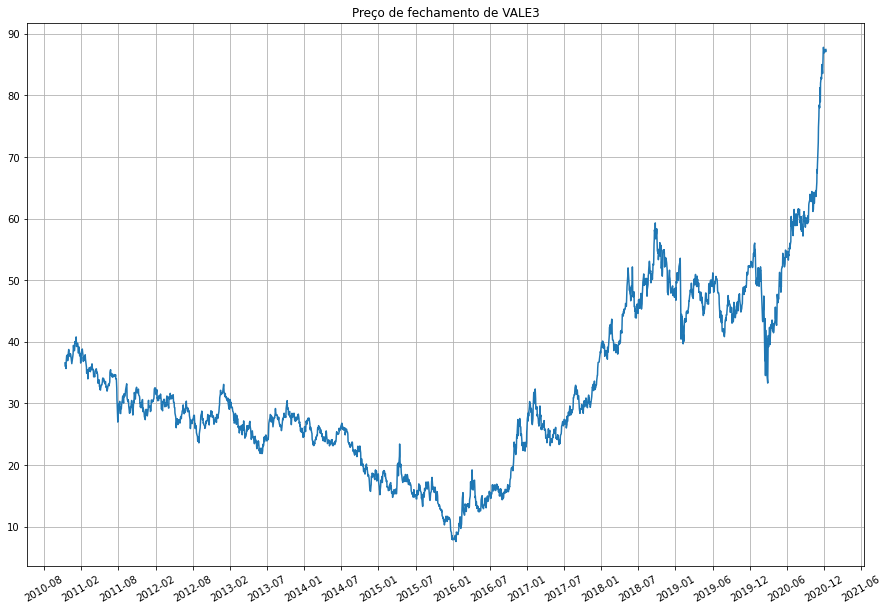

In [8]:

fig, ax = plt.subplots(figsize=(15, 10))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.xaxis.set_major_locator(mdates.DayLocator(interval=180)) 
ax.xaxis.set_tick_params(rotation = 30)

ax.plot(df.date, df.close)

ax.grid(True)


ax.set_title('Preço de fechamento de VALE3')

Gráfico da variação percentual do preço de fechamento

<AxesSubplot:>

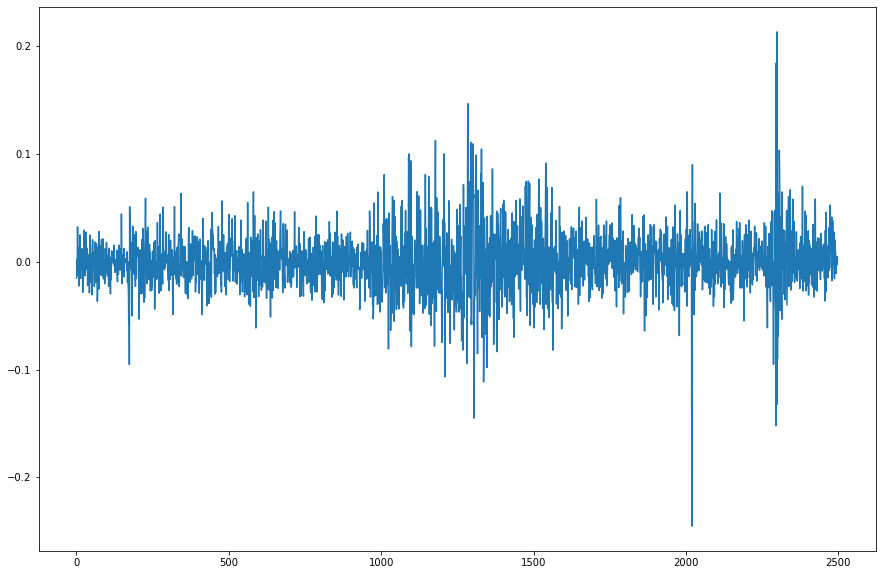

In [9]:
df['close_change'] = df.close.pct_change()
df.close_change.plot(figsize=(15, 10))

Multiplos graficos na mesma plotagem

Text(0.5, 0, 'XLabel1 0')

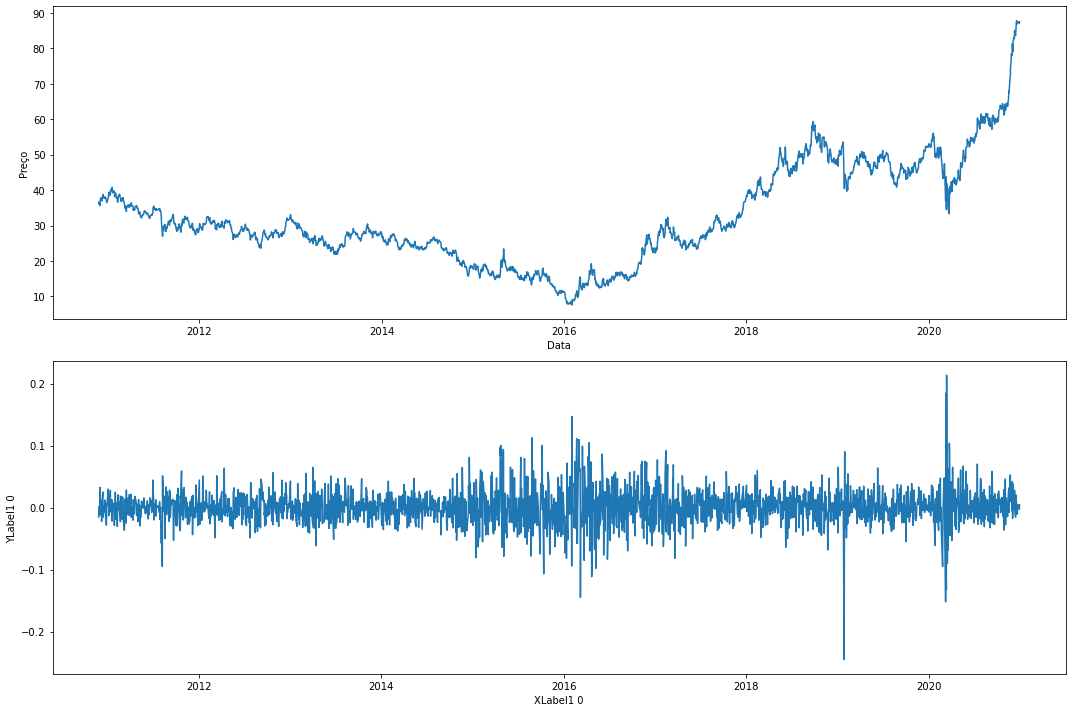

In [10]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(15, 10))
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(df.date, df.close)
ax.set_ylabel('Preço')
ax.set_xlabel('Data')


ax = fig.add_subplot(gs[1, :])
ax.plot(df.date, df.close_change)
ax.set_ylabel('YLabel1 %d' % 0)
ax.set_xlabel('XLabel1 %d' % 0)

Indo um pouco mais a fundo na analise dos graficos.
Vamos utilziar o grafico conhecido como Boxplot, que é um grafico que exibe a distribuição da nossa amostra. Com ele é possivel identificar os quartis, em resumo, onde estão os 25%, 50% e 75% dos nossos valores

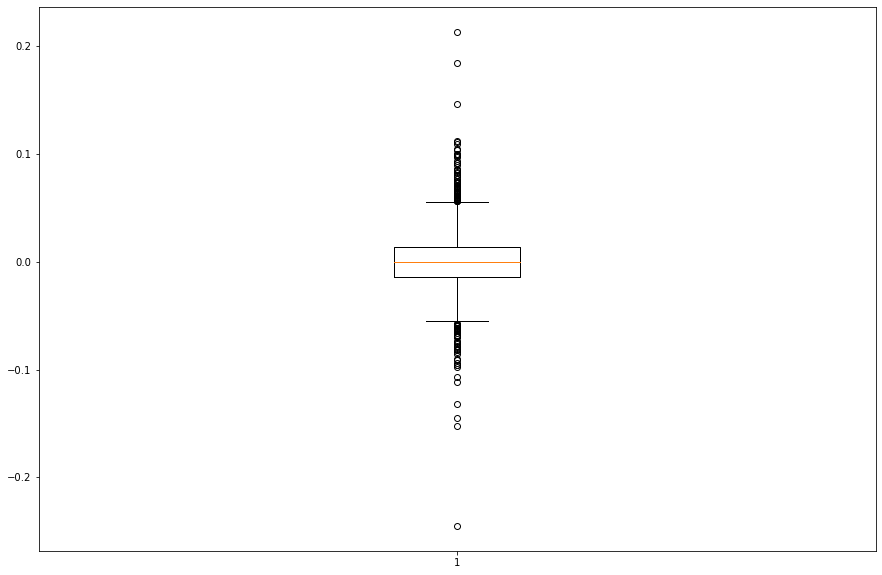

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
ax.boxplot(df.close_change.dropna())
plt.show()

In [12]:
df.close_change.describe()

count    2497.000000
mean        0.000719
std         0.027195
min        -0.245100
25%        -0.013728
50%         0.000000
75%         0.013975
max         0.213438
Name: close_change, dtype: float64

<AxesSubplot:>

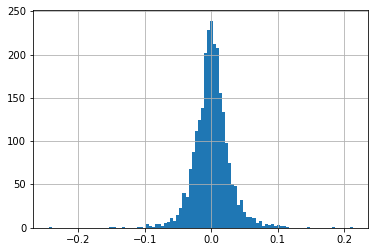

In [13]:
df.close_change.hist(bins=100)

In [14]:
df = df.dropna()

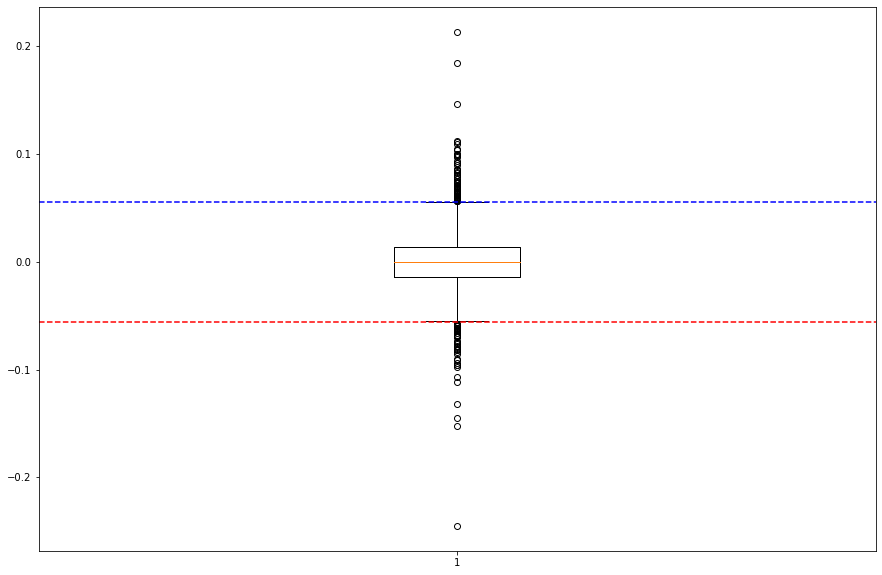

In [15]:
p25, p75 = df.close_change.describe()[['25%', '75%']]

pmin = max(min(df.close_change), p25 - 1.5 * (p75 -p25))
pmax = min(max(df.close_change), p75 + 1.5 * (p75 -p25))


fig, ax = plt.subplots(figsize=(15,10))
ax.boxplot(df.close_change.dropna())
ax.axhline(pmin,  color='r', linestyle='--')
ax.axhline(pmax,  color='b', linestyle='--')
plt.show()


In [17]:
print(pmin, pmax)

-0.05528213550832256 0.05553006393238552


In [16]:
df[(df.close_change < pmin) | (df.close_change > pmax)]

,date,open,high,low,close,volume,dividend,split,close_change
172,2011-08-04,31.51,31.63,30.34,30.57,8555,0,1,-0.057645
174,2011-08-08,28.26,28.56,26.80,26.98,8566,0,1,-0.095238
227,2011-10-24,29.33,30.60,29.22,30.46,6188,0,1,0.059110
343,2012-04-12,29.66,31.20,29.64,31.11,9942,0,1,0.063590
478,2012-10-25,27.62,28.09,27.41,28.01,5355,0,1,0.056582
...,...,...,...,...,...,...,...,...,...
2336,2020-05-08,46.40,47.82,45.88,47.71,34782,0,1,0.060694
2342,2020-05-18,49.17,50.40,48.79,50.07,41825,0,1,0.066908
2351,2020-05-29,50.20,51.77,49.87,51.77,92235,0,1,0.058258
2382,2020-07-14,56.57,60.53,56.55,60.26,51948,0,1,0.070147


Text(0.5, 0, 'XLabel1 0')

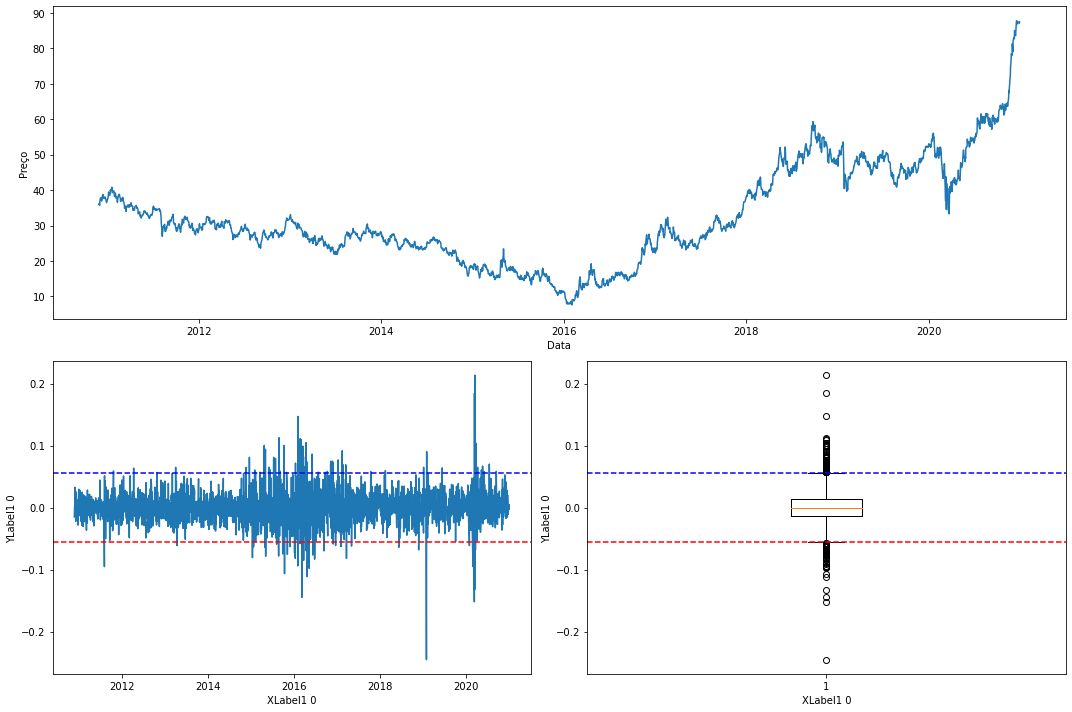

In [24]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(15, 10))
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(df.date, df.close)
ax.set_ylabel('Preço')
ax.set_xlabel('Data')

ax = fig.add_subplot(gs[1, 0])
ax.plot(df.date, df.close_change)
ax.axhline(pmin,  color='r', linestyle='--')
ax.axhline(pmax,  color='b', linestyle='--')
ax.set_ylabel('YLabel1 %d' % 0)
ax.set_xlabel('XLabel1 %d' % 0)

ax = fig.add_subplot(gs[1, 1])
ax.boxplot(df.close_change.dropna())
ax.axhline(pmin,  color='r', linestyle='--')
ax.axhline(pmax,  color='b', linestyle='--')

ax.set_ylabel('YLabel1 %d' % 0)
ax.set_xlabel('XLabel1 %d' % 0)

In [25]:
display(plot_triggers)

,date,open,high,low,close,volume,dividend,split,close_change
2019,2019-01-28,42.93,45.80,40.42,40.44,183534,0,1,-0.245100
2267,2020-01-27,50.46,50.61,49.31,49.34,38779,0,1,-0.061085
2287,2020-02-26,45.57,45.75,44.01,44.30,46923,0,1,-0.095180
2295,2020-03-09,39.51,40.57,36.93,36.95,58884,0,1,-0.151939
2297,2020-03-11,42.01,43.26,38.09,39.79,49607,0,1,-0.090930
2298,2020-03-12,35.16,35.16,31.70,34.53,61994,0,1,-0.132194
2300,2020-03-16,35.17,40.44,35.17,38.13,58833,0,1,-0.089976
2302,2020-03-18,37.90,39.92,34.87,37.75,59550,0,1,-0.068821
2303,2020-03-19,36.63,38.09,34.44,35.55,52142,0,1,-0.058278


Text(0.5, 1.0, 'Preço de fechamento de VALE3')

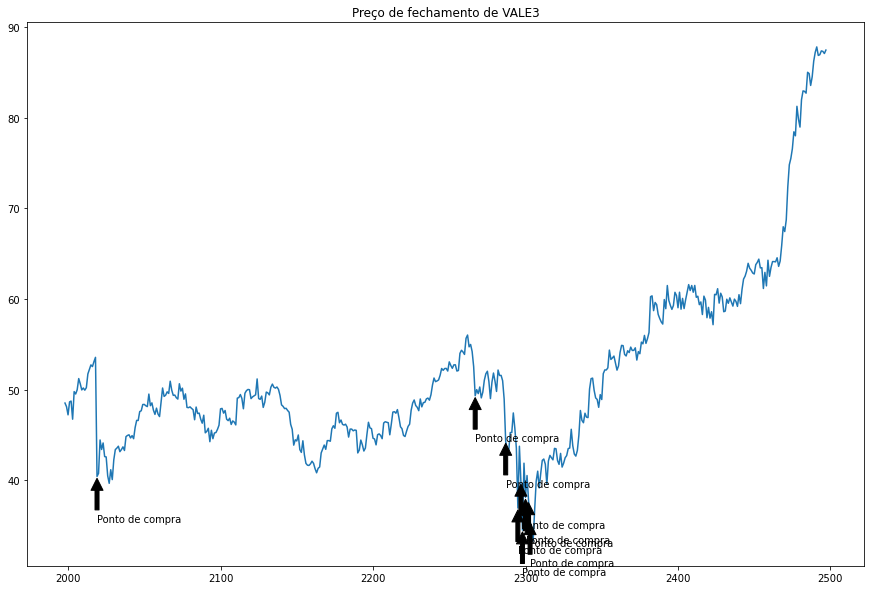

In [26]:
fig, ax = plt.subplots(figsize=(15,10))

plot_data = df[-500:]

plot_triggers = plot_data[(plot_data.close_change < pmin)]

ax.plot(plot_data.close)

for i, c in plot_triggers.iterrows():    
    ax.annotate('Ponto de compra', xy=(i, c.close), xytext=(i, c.close - 5),
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

ax.set_title('Preço de fechamento de VALE3')